# 載入台灣鄉鎮市區界線資料

資料連結：https://data.gov.tw/dataset/7441

In [1]:
import geopandas as gpd

In [2]:
#df.sample(10)

# 需要county code和county name的對應字典的話可以把這邊uncomment掉
# county_code = df[['COUNTYCODE','COUNTYNAME']].drop_duplicates().set_index('COUNTYCODE')['COUNTYNAME'].to_dict()
# county_code

In [3]:
'''新計算county的polygons並存成shp檔'''
# shp = gpd.read_file('./county_data/TOWN_MOI_1081121.shp',encoding='utf-8')
# # 把同縣市的鄉鎮市polygon merge起來
# county = shp.dissolve(by='COUNTYCODE', aggfunc='first').reset_index()
# county = county[['COUNTYCODE', 'geometry', 'COUNTYNAME', 'COUNTYID']]
# county.to_file("./county_table/counties.shp", encoding='utf-8')
# # 另外儲存每個county的geometry資訊
# county_centroid_gdf = county.copy()
# county_centroid_gdf['geometry'] = county['geometry'].centroid
# county_centroid_gdf.to_file("./county_table/counties_centroid.shp", encoding='utf-8')

'''已經有shp檔，直接讀進來'''
import geopandas as gpd
county = gpd.read_file('./county_table/counties.shp',encoding='utf-8')

county

,COUNTYCODE,COUNTYNAME,COUNTYID,geometry
0,09007,連江縣,Z,"MULTIPOLYGON (((119.96445 25.94552, 119.96427 ..."
1,09020,金門縣,W,"MULTIPOLYGON (((118.23381 24.16277, 118.23405 ..."
2,10002,宜蘭縣,G,"MULTIPOLYGON (((121.84516 24.64467, 121.84516 ..."
3,10004,新竹縣,J,"POLYGON ((121.20316 24.51249, 121.20305 24.512..."
4,10005,苗栗縣,K,"POLYGON ((120.90982 24.29397, 120.90939 24.294..."
5,10007,彰化縣,N,"POLYGON ((120.68380 23.80134, 120.68373 23.801..."
6,10008,南投縣,M,"POLYGON ((121.23491 23.81811, 121.23487 23.818..."
7,10009,雲林縣,P,"MULTIPOLYGON (((120.08108 23.52412, 120.08161 ..."
8,10010,嘉義縣,Q,"MULTIPOLYGON (((120.65198 23.29118, 120.65157 ..."
9,10013,屏東縣,T,"MULTIPOLYGON (((120.89699 22.14411, 120.89704 ..."


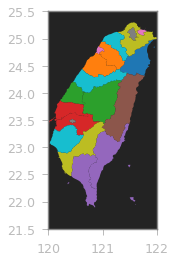

In [4]:
# 把county的資料做視覺化
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1)
# f.set_figheight(15)
# f.set_figwidth(15)
ax.set_xlim((120,122))
ax.set_ylim((21.5,25.5))
county.plot(ax=ax, column='COUNTYCODE')

# 需要在圖上加點的話可以參考這邊
# from shapely.geometry import Point
# p1 = gpd.GeoSeries(Point(121.044760, 24.902980))
# p1.plot(ax=ax, marker='o', color='red', markersize=20)
# p2 = gpd.GeoSeries(Point(120.99472986085, 24.90748396855956))
# p2.plot(ax=ax, marker='o', color='green', markersize=20)

# 讀入資料並查詢基地台的所在縣市

!!! Search: "記得改路徑"

In [5]:
import pandas as pd
pd.options.display.max_columns = 500

# 記得改路徑
root = '/home/sensinggo/mnt/wirelab/Documents/EmLSTM/TTI/Data/cellCount/20200130/'
f = 'oldTest.csv'
# root = '/home/sensinggo/mnt/wirelab/Documents/DeepTTI_light/20191224_DeepTTI_Light_Speedest(3-steps-experiment-2)/data/'
# f = 'new_test_v2.csv'
df = pd.read_csv(root+f)

# 為了加速計算，drop_duplicate讓每個基地台只要計算一次就好，之後再merge回原始的dataset
df = df.drop_duplicates(subset=['CellID','PCI','TAC','MNC','LTE']).reset_index()

In [6]:
# 將原來的dataframe轉成Geodataframe 
# 會根據(cLat, cLng)生成新的'geometry'欄位，這個欄位在算這個點屬於哪個polygons時會用到
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.cLng, df.cLat))
gdf.sample(5)

,index,Unnamed: 0,Unnamed: 0.1,user,isHandover,CellID,PCI,TAC,MNC,timeStamp,time,rsrp,label,cellid1,cellid2,cellid3,TAC1,TAC2,LTE,Wcdma,handoverRate_ss3,handoverRate_ss10,handoverRate_ss20,handoverRate_ss40,handoverRate_ss80,cLat,cLng,cellInfoType,MNC_orig,cellCount_latest,cellCount_exist,isFirst,geometry
7754,82081,82081,82081,CM0212,1,33524092,340,10511,2,2017-02-21 16:51:37:337,1487667097336,-67,3,33,524,92,10,511,0,1,2,4,5,5,5,23.430144,120.394244,Wcdma,92,"[0, 0, 0, 1, 0]","[1, 0, 0, 1, 0]",0,POINT (120.39424 23.43014)
1290,11104,11104,11104,CM0006,1,157736717,370,36402,2,2017-02-04 11:01:33:173,1486177293172,-90,4,157,736,717,36,402,1,0,2,3,6,6,6,23.005879,120.248299,LTE,92,"[0, 0, 0, 0, 1]","[1, 0, 0, 0, 1]",0,POINT (120.24830 23.00588)
1238,10753,10753,10753,CM0006,1,157860631,370,36400,2,2017-02-04 10:40:11:485,1486176011484,-106,4,157,860,631,36,400,1,0,3,7,8,8,8,23.299054,120.284990,LTE,92,"[0, 0, 0, 0, 1]","[1, 0, 0, 0, 1]",0,POINT (120.28499 23.29905)
4574,47957,47957,47957,CM0211,1,60944772,65,11440,3,2017-02-15 16:53:42:643,1487148822643,-87,3,60,944,772,11,440,1,0,2,3,4,4,4,24.994257,121.425659,LTE,97,"[0, 0, 0, 1, 0]","[1, 0, 0, 1, 0]",0,POINT (121.42566 24.99426)
2308,18962,18962,18962,CM0007,1,181896983,298,39792,0,2017-02-04 11:03:09:435,1486177389435,-104,4,181,896,983,39,792,1,0,2,4,7,7,7,22.983933,120.246997,LTE,1,"[0, 0, 0, 0, 1]","[1, 0, 0, 0, 1]",0,POINT (120.24700 22.98393)


In [7]:
# 計算每筆基地台的資料和各縣市的交集為True/False
result_df = pd.DataFrame()
for index, row in county.iterrows():
    result_df[row['COUNTYNAME']] = gdf.within(row['geometry'])
    print(row['COUNTYNAME'])
    #print(result_df[row['COUNTYNAME']].value_counts())    

result_df.sample(5)
#print(pnts_df.within(county.loc[19, 'geometry']))

連江縣
金門縣
宜蘭縣
新竹縣
苗栗縣
彰化縣
南投縣
雲林縣
嘉義縣
屏東縣
臺東縣
花蓮縣
澎湖縣
基隆市
新竹市
嘉義市
臺北市
高雄市
新北市
臺中市
臺南市
桃園市


,連江縣,金門縣,宜蘭縣,新竹縣,苗栗縣,彰化縣,南投縣,雲林縣,嘉義縣,屏東縣,臺東縣,花蓮縣,澎湖縣,基隆市,新竹市,嘉義市,臺北市,高雄市,新北市,臺中市,臺南市,桃園市
1919,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
7072,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
10960,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5157,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
5450,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [8]:
# 將縣市資訊更新回原來的Cell ID dataset (經過drop_duplicate的)
df['county']='未知'
for county in result_df.columns[:]: # 小心檢查columns[?:]
    print(county)
    idx = result_df.index[result_df[county]==True]
    if(len(idx)>0):
        df.loc[idx,'county'] = county

連江縣
金門縣
宜蘭縣
新竹縣
苗栗縣
彰化縣
南投縣
雲林縣
嘉義縣
屏東縣
臺東縣
花蓮縣
澎湖縣
基隆市
新竹市
嘉義市
臺北市
高雄市
新北市
臺中市
臺南市
桃園市


In [9]:
# 將查詢結果存成table
root = './county_table/'
# 記得改路徑
f = 'oldTest_county_table.csv'
#f = 'new_test_v2_county_table.csv'

df[['CellID','PCI','TAC','MNC','LTE','county']].to_csv(root+f, index=False)

# Look up and update county for data (覺得這邊好像有錯...先不要用)

In [12]:
import pandas as pd
pd.options.display.max_columns = 500

# 要update的data
# 記得改路徑
orig_data_root = '/home/sensinggo/mnt/wirelab/Documents/DeepTTI_light/20191224_DeepTTI_Light_Speedest(3-steps-experiment-2)/data/'
orig_data_f = 'new_test_v2.csv'
output_data_f = 'new_test_v2_with_county.csv'

# 提供查詢的table
county_root = './county_table/'
# 記得改路徑
county_f = 'new_test_v2_county_table.csv'

df = pd.read_csv(orig_data_root+orig_data_f)
county_table = pd.read_csv(county_root + county_f)
new_df = df.merge(county_table)
new_df.sample(10)

,user,isHandover,CellID,PCI,TAC,MNC,timeStamp,time,rsrp,label,cellid1,cellid2,cellid3,TAC1,TAC2,LTE,Wcdma,handoverRate_ss3,handoverRate_ss10,handoverRate_ss20,handoverRate_ss40,handoverRate_ss80,MNC_orig,cellInfoType,cLat,cLng,cellCount_latest,cellCount_exist,isFirst,county
15564,asus,1,83719145,17,22540,3,2019-11-14 18:47:15,1573728435990,-92,1,83,719,145,22,540,1,0,3,6,11,11,11,97,LTE,24.951873,121.137709,"[0, 1, 0, 0, 0]","[0, 1, 0, 0, 0]",0,桃園市
9265,oppo,0,27682415,477,11290,3,2019-11-04 14:55:15,1572850515558,-95,2,27,682,415,11,290,1,0,0,0,0,0,0,97,LTE,25.037339,121.504620,"[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]",0,臺北市
25029,asus,0,91397488,392,33230,3,2019-09-24 14:04:19,1569305060550,-106,1,91,397,488,33,230,1,0,0,0,1,1,1,97,LTE,24.503051,120.725053,"[0, 1, 0, 0, 0]","[1, 1, 0, 0, 0]",0,苗栗縣
9103,oppo,0,60439438,474,11290,3,2019-11-04 14:24:20,1572848660854,-80,2,60,439,438,11,290,1,0,0,4,4,4,4,97,LTE,24.964875,121.431032,"[0, 0, 1, 0, 0]","[1, 0, 1, 0, 0]",0,新北市
15948,asus,0,81978347,483,22530,3,2019-11-14 16:21:25,1573719685626,-84,1,81,978,347,22,530,1,0,0,0,0,0,0,97,LTE,24.994573,121.196300,"[0, 1, 0, 0, 0]","[1, 1, 0, 0, 0]",0,桃園市
4754,oppo,0,56355215,476,11290,3,2019-11-04 14:46:06,1572849966223,-75,2,56,355,215,11,290,1,0,2,2,2,2,2,97,LTE,25.011433,121.460732,"[0, 0, 1, 0, 0]","[1, 0, 1, 0, 0]",0,新北市
3823,oppo,0,29470706,500,11290,3,2019-11-04 13:42:52,1572846172119,-95,2,29,470,706,11,290,1,0,0,2,2,2,2,97,LTE,25.052338,121.603792,"[0, 0, 1, 0, 0]","[1, 0, 1, 0, 0]",0,臺北市
2384,asus,1,56349415,14,11430,3,2019-11-14 18:31:48,1573727508493,-97,1,56,349,415,11,430,1,0,4,4,5,5,5,97,LTE,25.005424,121.446300,"[0, 0, 0, 1, 0]","[0, 1, 0, 1, 0]",0,新北市
17122,asus,0,77336431,411,22590,3,2019-11-14 18:52:34,1573728754168,-97,1,77,336,431,22,590,1,0,1,4,8,8,8,97,LTE,24.810363,121.043385,"[0, 1, 0, 0, 0]","[0, 1, 0, 0, 0]",0,新竹縣
23082,samsung,0,81555234,189,13701,2,2019-11-14 14:40:26,1573713626640,-86,4,81,555,234,13,701,1,0,0,1,1,1,1,92,LTE,24.854397,121.017153,"[0, 0, 0, 0, 1]","[0, 0, 0, 0, 1]",0,新竹縣


In [13]:
new_df[new_df['county']=='未知']

,user,isHandover,CellID,PCI,TAC,MNC,timeStamp,time,rsrp,label,cellid1,cellid2,cellid3,TAC1,TAC2,LTE,Wcdma,handoverRate_ss3,handoverRate_ss10,handoverRate_ss20,handoverRate_ss40,handoverRate_ss80,MNC_orig,cellInfoType,cLat,cLng,cellCount_latest,cellCount_exist,isFirst,county


In [14]:
print(new_df[['county']].isnull().any())

county    False
dtype: bool


In [15]:
#new_df[new_df.columns[2:]].to_csv('oldTrain_with_county.csv', index=False)
# 記得改路徑
new_df.to_csv(output_data_f, index=False)